In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
import seaborn as sns
from pathlib import Path

In [3]:
sns.set(font_scale=1.5)
sns.set_style("ticks")

In [41]:
# results_path = "stead_phasenet/version_2"
# results_path = "stead_eqtransformer/version_0"
# results_path = "ethz_eqtransformer/version_0"
# results_path = "ethz_phasenet/version_0"
# results_path = "stead_gpd/version_1"
# results_path = "stead_cred/version_0"
results_path = "stead_basicphaseae/version_0"

split = "dev"

# Task 1 - Event detection

In [42]:
pred = pd.read_csv(f"pred/{results_path}/{split}_task1.csv")

pred["trace_type_bin"] = pred["trace_type"] == "earthquake"

Text(0, 0.5, 'true positive rate')

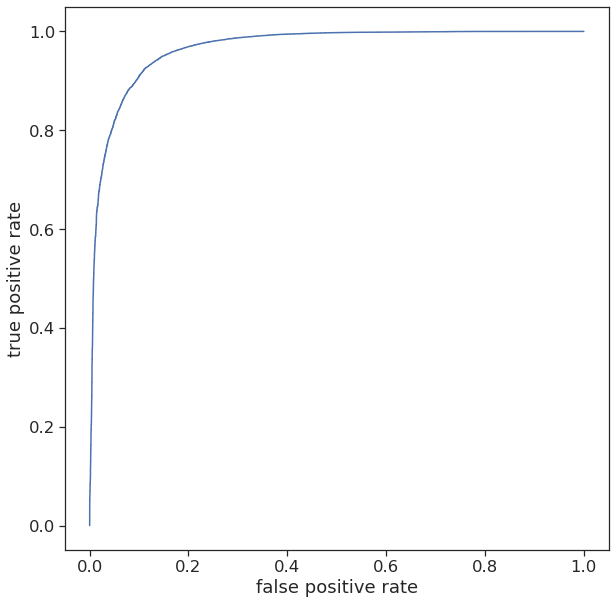

In [43]:
fpr, tpr, _ = roc_curve(pred["trace_type_bin"], pred["score_detection"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.set_aspect("equal")

ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

Optimal F1: 0.9625399988503325
Optimal F1 threshold: 0.728919


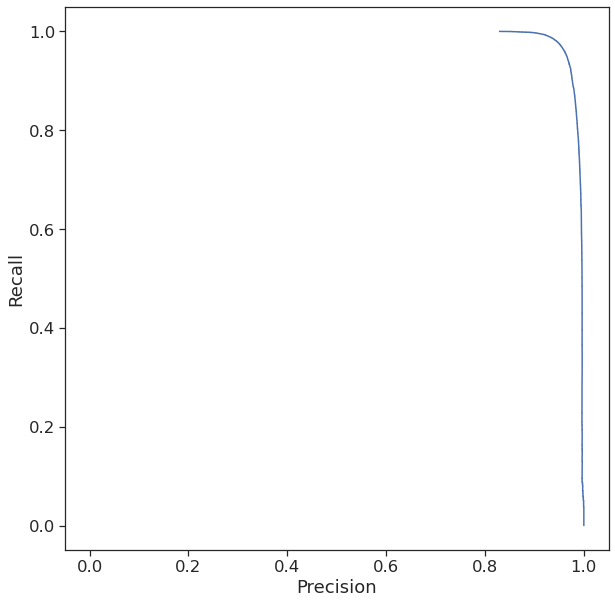

In [44]:
prec, recall, thr = precision_recall_curve(pred["trace_type_bin"], pred["score_detection"])

f1 = 2 * prec * recall / (prec + recall)
f1_threshold = thr[np.nanargmax(f1)]
best_f1 = np.max(f1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(prec, recall)
ax.set_aspect("equal")

ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
ax.set_xlim(ax.get_ylim())

print("Optimal F1:", best_f1)
print("Optimal F1 threshold:", f1_threshold)

# Task 2 - Phase identification

In [45]:
pred = pd.read_csv(f"pred/{results_path}/{split}_task23.csv")
pred["phase_label_bin"] = pred["phase_label"] == "P"

Text(0, 0.5, 'true positive rate')

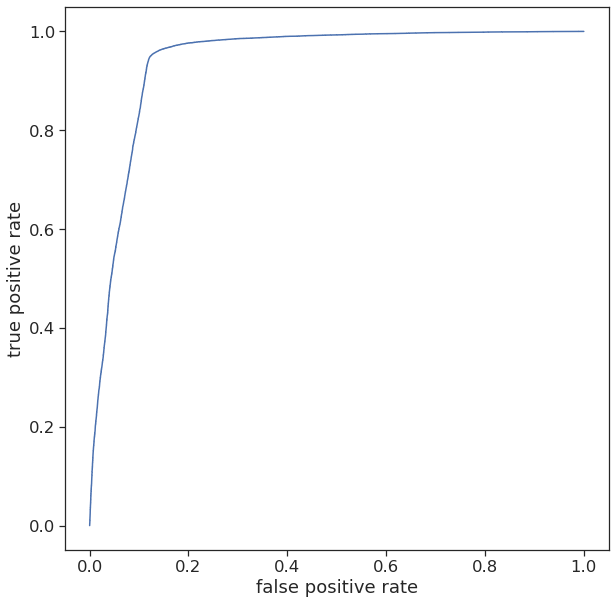

In [46]:
fpr, tpr, _ = roc_curve(pred["phase_label_bin"], pred["score_p_or_s"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.set_aspect("equal")

ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

Optimal F1: 0.8924950463545508
Optimal F1 threshold: 0.993137


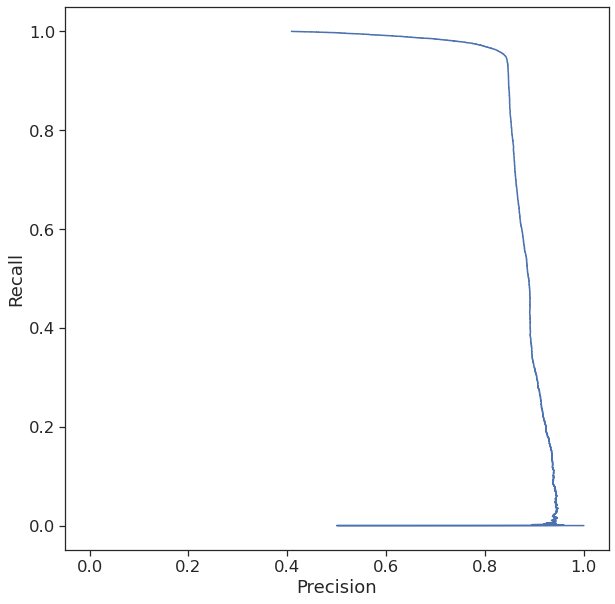

In [47]:
prec, recall, thr = precision_recall_curve(pred["phase_label_bin"], pred["score_p_or_s"])

f1 = 2 * prec * recall / (prec + recall)
f1_threshold = thr[np.nanargmax(f1)]
best_f1 = np.max(f1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(prec, recall)
ax.set_aspect("equal")

ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
ax.set_xlim(ax.get_ylim())

print("Optimal F1:", best_f1)
print("Optimal F1 threshold:", f1_threshold)

# Task 3 - Onset determination

In [48]:
pred = pd.read_csv(f"pred/{results_path}/{split}_task23.csv")

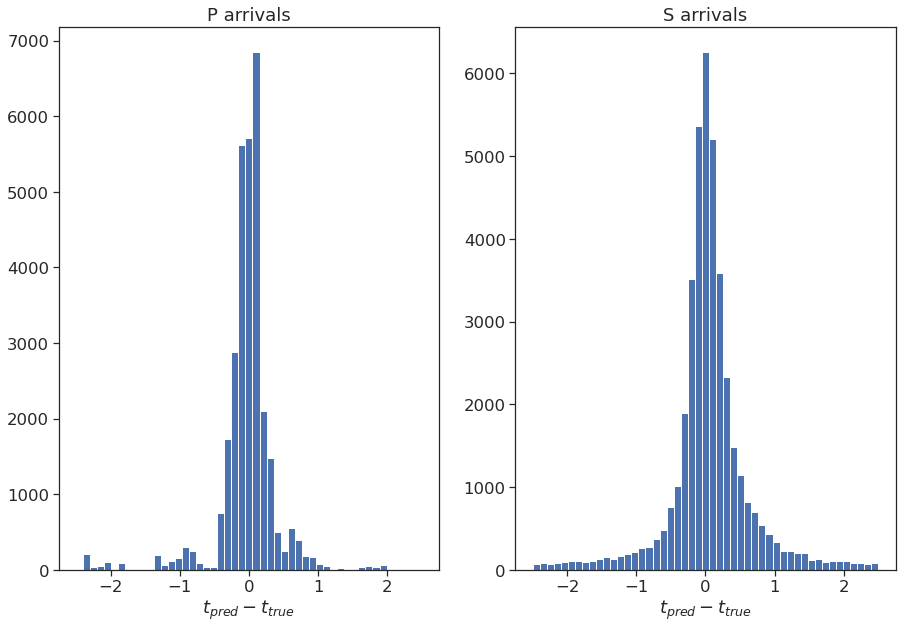

In [49]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(1, 2)

for i, phase in enumerate(["P", "S"]):
    ax = axs[i]
    ax.set_title(f"{phase} arrivals")
    pred_phase = pred[pred["phase_label"] == phase]
    pred_col = f"{phase.lower()}_sample_pred"
    
    diff = (pred_phase[pred_col] - pred_phase["phase_onset"]) / pred_phase["sampling_rate"]
    
    bins = np.linspace(-2.5, 2.5, 50)
    ax.hist(diff, bins=bins)
    ax.set_xlabel("$t_{pred} - t_{true}$")

# Systematic evaluation

In [40]:
results = pd.read_csv("results.csv")

In [42]:
results

,experiment,data,model,version,dev_phase_precision,dev_phase_recall,dev_phase_f1,det_threshold,test_phase_precision,test_phase_recall,...,test_P_mean_s,test_P_std_s,test_S_mean_s,test_S_std_s,dev_det_precision,dev_det_recall,dev_det_f1,test_det_precision,test_det_recall,test_det_f1
0,ethz_basicphaseae,ethz,basicphaseae,0,0.929260,0.925204,0.927228,2.661820,0.870442,0.923920,...,-1.021673,2.464913,0.483762,2.271394,0.941005,0.887115,0.913265,0.917775,0.855889,0.885752
1,ethz_cred,ethz,cred,0,NaN,NaN,NaN,0.061431,NaN,NaN,...,NaN,NaN,NaN,NaN,0.920923,0.923458,0.922189,0.890877,0.911779,0.901207
2,ethz_eqtransformer,ethz,eqtransformer,0,0.986736,0.995925,0.991309,1.081300,0.980818,0.994778,...,-0.017580,0.352667,0.055154,0.490219,0.855834,0.951267,0.901030,0.855084,0.927992,0.890048
3,ethz_gpd,ethz,gpd,0,0.957988,0.975553,0.966691,1.003380,0.933438,0.973582,...,-0.221897,0.546060,0.373339,0.792164,0.889280,0.973018,0.929266,0.876401,0.977206,0.924062
4,ethz_phasenet,ethz,phasenet,0,0.960976,0.974680,0.967779,0.835491,0.932873,0.969076,...,0.103141,0.593189,0.202372,0.817687,0.910662,0.943007,0.926552,0.892796,0.942012,0.916744
5,geofon_basicphaseae,geofon,basicphaseae,0,0.976159,1.000000,0.987936,11.934400,0.985269,0.999978,...,-1.070593,3.038614,0.466220,3.966954,0.502529,0.993968,0.667556,0.504098,0.989045,0.667820
6,geofon_cred,geofon,cred,0,NaN,NaN,NaN,0.670642,NaN,NaN,...,NaN,NaN,NaN,NaN,0.932789,0.882789,0.907100,0.932185,0.866750,0.898278
7,geofon_eqtransformer,geofon,eqtransformer,0,0.994834,0.997604,0.996217,3.650670,0.997622,0.996761,...,0.144612,0.950864,0.298851,1.352388,0.960301,0.948022,0.954122,0.949750,0.931880,0.940730
8,geofon_gpd,geofon,gpd,0,0.989616,0.997568,0.993576,1.619350,0.995616,0.995080,...,0.129527,1.532946,0.101767,1.356642,0.766530,0.862633,0.811747,0.759951,0.855725,0.804999
9,geofon_phasenet,geofon,phasenet,0,0.984666,0.995771,0.990187,2.854920,0.991143,0.992009,...,0.153964,1.305541,0.303948,1.709203,0.877770,0.844067,0.860589,0.867750,0.839472,0.853377


In [78]:
def results_to_array(results, cols):
    data_dict = {data: i for i, data in enumerate(results["data"].unique())}
    model_dict = {model: i for i, model in enumerate(results["model"].unique())}

    n_data = len(results["data"].unique())
    n_model = len(results["model"].unique())
    
    res_array = np.nan * np.zeros((n_data, n_model, len(cols)))
    
    for _, row in results.iterrows():
        entry = res_array[data_dict[row["data"]], model_dict[row["model"]]]
        for col_idx, col in enumerate(cols):
            entry[col_idx] = row[col]
    
    return data_dict, model_dict, res_array

In [79]:
def results_to_table(results, cols, labels=None):
    data_dict, model_dict, res_array = results_to_array(results, cols)
    
    n_data = len(results["data"].unique())
    n_model = len(results["model"].unique())
    
    inv_data_dict = {v: k for k, v in data_dict.items()}
    inv_model_dict = {v: k for k, v in model_dict.items()}

    header = ""
    header_count = 1
    for j in range(n_model):
        if np.isnan(res_array[:, j]).all():
            print(f"Skipping {inv_model_dict[j]}")
            continue
        header += f" & \multicolumn{{{len(cols)}}}{{|c}}{{{inv_model_dict[j]}}}"
        header_count += 1
    header += f" & \multicolumn{{{len(cols)}}}{{|c}}{{average}} \\\\"
    
    if labels is not None:
        label_str = " & ".join([""] + header_count * labels) + "\\\\"
    else:
        label_str = ""
    
    colspec = "|".join(["c"] + header_count * ["c" * len(cols)])
    tabular = f"\\begin{{tabular}}{{{colspec}}}"
    
    table_str = [tabular, header, label_str, "\\hline"]
    
    for i in range(n_data):
        line = inv_data_dict[i]
        if np.isnan(res_array[i]).all():
            print(f"Skipping {inv_data_dict[i]}")
            continue
        for j in range(n_model):
            if np.isnan(res_array[:, j]).all():
                print(f"Skipping {inv_model_dict[j]}")
                continue
            for col_idx, _ in enumerate(cols):
                line += f" & {res_array[i, j, col_idx]:.2f}"
        
        avg = np.nanmean(res_array[i], axis=0)
        for col_idx, _ in enumerate(cols):
            line += f" & {avg[col_idx]:.2f}"
        
        line += " \\\\"
        table_str.append(line)
    
    table_str.append("\\hline")
    
    line = "average"
    for j in range(n_model):
        if np.isnan(res_array[:, j]).all():
            print(f"Skipping {inv_model_dict[j]}")
            continue
        avg = np.nanmean(res_array[:, j], axis=0)
        
        for col_idx, _ in enumerate(cols):
            line += f" & {avg[col_idx]:.2f}"
    
    line += " \\\\"
    table_str.append(line)    
    table_str.append("\\end{tabular}")
    
    return "\n".join(table_str)

In [80]:
table = results_to_table(results, ["test_det_precision", "test_det_recall", "test_det_f1"], ["P", "R", "F1"])
print(table)

Skipping neic
\begin{tabular}{c|ccc|ccc|ccc|ccc|ccc|ccc}
 & \multicolumn{3}{|c}{basicphaseae} & \multicolumn{3}{|c}{cred} & \multicolumn{3}{|c}{eqtransformer} & \multicolumn{3}{|c}{gpd} & \multicolumn{3}{|c}{phasenet} & \multicolumn{3}{|c}{average} \\
 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1\\
\hline
ethz & 0.92 & 0.86 & 0.89 & 0.89 & 0.91 & 0.90 & 0.86 & 0.93 & 0.89 & 0.88 & 0.98 & 0.92 & 0.89 & 0.94 & 0.92 & 0.89 & 0.92 & 0.90 \\
geofon & 0.50 & 0.99 & 0.67 & 0.93 & 0.87 & 0.90 & 0.95 & 0.93 & 0.94 & 0.76 & 0.86 & 0.80 & 0.87 & 0.84 & 0.85 & 0.80 & 0.90 & 0.83 \\
instance & 0.87 & 1.00 & 0.93 & 0.95 & 0.95 & 0.95 & 0.94 & 0.97 & 0.95 & 0.95 & 0.95 & 0.95 & 0.96 & 0.93 & 0.95 & 0.93 & 0.96 & 0.94 \\
stead & 0.98 & 0.99 & 0.98 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 0.97 & 1.00 & 0.98 & 0.99 & 1.00 & 0.99 & 0.99 & 1.00 & 0.99 \\
\hline
average & 0.82 & 0.96 & 0.87 & 0.94 & 0.93 & 0.94 & 0.94 & 0.96 & 0.95 & 0.89 & 0.94 & 0.92 & 0.93 & 0.93 & 0.

In [71]:
table = results_to_table(results, ["test_phase_precision", "test_phase_recall", "test_phase_f1"], ["P", "R", "F1"])
print(table)

Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping cred
\begin{tabular}{c|ccc|ccc|ccc|ccc|ccc}
 & \multicolumn{3}{|c}{basicphaseae} & \multicolumn{3}{|c}{eqtransformer} & \multicolumn{3}{|c}{gpd} & \multicolumn{3}{|c}{phasenet} & \multicolumn{3}{|c}{average} \\
 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1\\
\hline
ethz & 0.87 & 0.92 & 0.90 & 0.98 & 0.99 & 0.99 & 0.93 & 0.97 & 0.95 & 0.93 & 0.97 & 0.95 & 0.93 & 0.97 & 0.95 \\
geofon & 0.99 & 1.00 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 0.99 & 0.99 & 0.99 & 0.99 & 1.00 & 0.99 \\
instance & 0.87 & 0.95 & 0.91 & 0.96 & 0.98 & 0.97 & 0.92 & 0.97 & 0.95 & 0.94 & 0.98 & 0.96 & 0.93 & 0.97 & 0.95 \\
neic & 0.87 & 0.97 & 0.92 & 0.99 & 0.99 & 0.99 & 0.95 & 0.98 & 0.96 & 0.93 & 0.98 & 0.95 & 0.94 & 0.98 & 0.96 \\
stead & 0.86 & 0.95 & 0.90 & 1.00 & 1.00 & 1.00 & 0.97 & 0.97 & 0.97 & 0.99 & 0.99 & 0.99 & 0.96 & 0.98 & 0.97 \\
\hline
average & 0.89 & 0.96 & 0.92 & 0.99 & 0.99

In [73]:
table = results_to_table(results, ["test_P_mean_s", "test_P_std_s"], ["$\\mu$", "$\\sigma$"])
print(table)

Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping cred
\begin{tabular}{c|cc|cc|cc|cc|cc}
 & \multicolumn{2}{|c}{basicphaseae} & \multicolumn{2}{|c}{eqtransformer} & \multicolumn{2}{|c}{gpd} & \multicolumn{2}{|c}{phasenet} & \multicolumn{2}{|c}{average} \\
 & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$\\
\hline
ethz & -1.02 & 2.46 & -0.02 & 0.35 & -0.22 & 0.55 & 0.10 & 0.59 & -0.29 & 0.99 \\
geofon & -1.07 & 3.04 & 0.14 & 0.95 & 0.13 & 1.53 & 0.15 & 1.31 & -0.16 & 1.71 \\
instance & -1.03 & 2.56 & -0.06 & 1.33 & -0.27 & 1.30 & -0.10 & 1.32 & -0.37 & 1.63 \\
neic & -1.01 & 2.92 & 0.00 & 0.39 & 0.10 & 1.49 & 0.24 & 1.46 & -0.17 & 1.56 \\
stead & -0.06 & 0.78 & -0.01 & 0.19 & -0.10 & 0.36 & 0.00 & 0.37 & -0.04 & 0.42 \\
\hline
average & -0.84 & 2.35 & 0.01 & 0.64 & -0.07 & 1.05 & 0.08 & 1.01 \\
\end{tabular}


In [74]:
table = results_to_table(results, ["test_S_mean_s", "test_S_std_s"], ["$\\mu$", "$\\sigma$"])
print(table)

Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping cred
\begin{tabular}{c|cc|cc|cc|cc|cc}
 & \multicolumn{2}{|c}{basicphaseae} & \multicolumn{2}{|c}{eqtransformer} & \multicolumn{2}{|c}{gpd} & \multicolumn{2}{|c}{phasenet} & \multicolumn{2}{|c}{average} \\
 & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$\\
\hline
ethz & 0.48 & 2.27 & 0.06 & 0.49 & 0.37 & 0.79 & 0.20 & 0.82 & 0.28 & 1.09 \\
geofon & 0.47 & 3.97 & 0.30 & 1.35 & 0.10 & 1.36 & 0.30 & 1.71 & 0.29 & 2.10 \\
instance & 0.58 & 2.45 & 0.24 & 1.26 & 0.12 & 1.28 & 0.26 & 1.26 & 0.30 & 1.56 \\
neic & 0.24 & 3.07 & 0.00 & 0.35 & 0.10 & 1.21 & 0.19 & 1.22 & 0.13 & 1.46 \\
stead & -0.02 & 1.47 & -0.00 & 0.23 & -0.10 & 0.40 & 0.01 & 0.30 & -0.03 & 0.60 \\
\hline
average & 0.35 & 2.65 & 0.12 & 0.73 & 0.12 & 1.01 & 0.19 & 1.06 \\
\end{tabular}


## Residual plot

In [159]:
def residual_matrix(phase, results, pred_path, lim=2):
    data_dict, model_dict, res_array = results_to_array(results, [f"test_{phase}_mean_s"])
    res_array = res_array[:, :, 0]
    
    n_data = len(results["data"].unique())
    n_model = len(results["model"].unique())
    
    inv_data_dict = {v: k for k, v in data_dict.items()}
    inv_model_dict = {v: k for k, v in model_dict.items()}
    
    true_n_data = np.sum((~np.isnan(res_array)).any(axis=1))
    true_n_model = np.sum((~np.isnan(res_array)).any(axis=0))
    
    fig = plt.figure(figsize=(15, 15))
    axs = fig.subplots(true_n_data, true_n_model, sharex=True, sharey=False, gridspec_kw={"hspace": 0.05, "wspace": 0.05})
    
    true_i = 0
    for i in range(n_data):
        if np.isnan(res_array[i]).all():
            continue
        true_j = 0
        for j in range(n_model):
            if np.isnan(res_array[:, j]).all():
                continue
            data, model = inv_data_dict[i], inv_model_dict[j]
            mask = np.logical_and(results["model"] == model, results["data"] == data)
            assert np.sum(mask) == 1
            
            row = results[mask].iloc[0]
            
            pred_path_loc = pred_path / f"{data}_{model}" / f"version_{row['version']}" / "test_task23.csv"
            pred = pd.read_csv(pred_path_loc)
            
            pred_phase = pred[pred["phase_label"] == phase]
            pred_col = f"{phase.lower()}_sample_pred"

            diff = (pred_phase[pred_col] - pred_phase["phase_onset"]) / pred_phase["sampling_rate"]
            
            bins = np.linspace(-lim, lim, 50)
            axs[true_i, true_j].hist(diff, bins=bins)
            
            axs[true_i, true_j].set_yticklabels([])
            axs[true_i, true_j].set_xlim(-lim, lim)
            
            axs[0, true_j].set_title(model)
            
            outliers = np.sum(np.abs(diff) > lim) / len(diff)
            axs[true_i, true_j].text(0.98, 0.98, f"{outliers:.2f}", transform=axs[true_i, true_j].transAxes, ha="right", va="top")
            
            true_j += 1
            
        axs[true_i, 0].set_ylabel(data)
        
        true_i += 1
    
    for ax in axs[-1]:
        ax.set_xlabel("$t_{pred} - t_{true}$")
    
    return fig

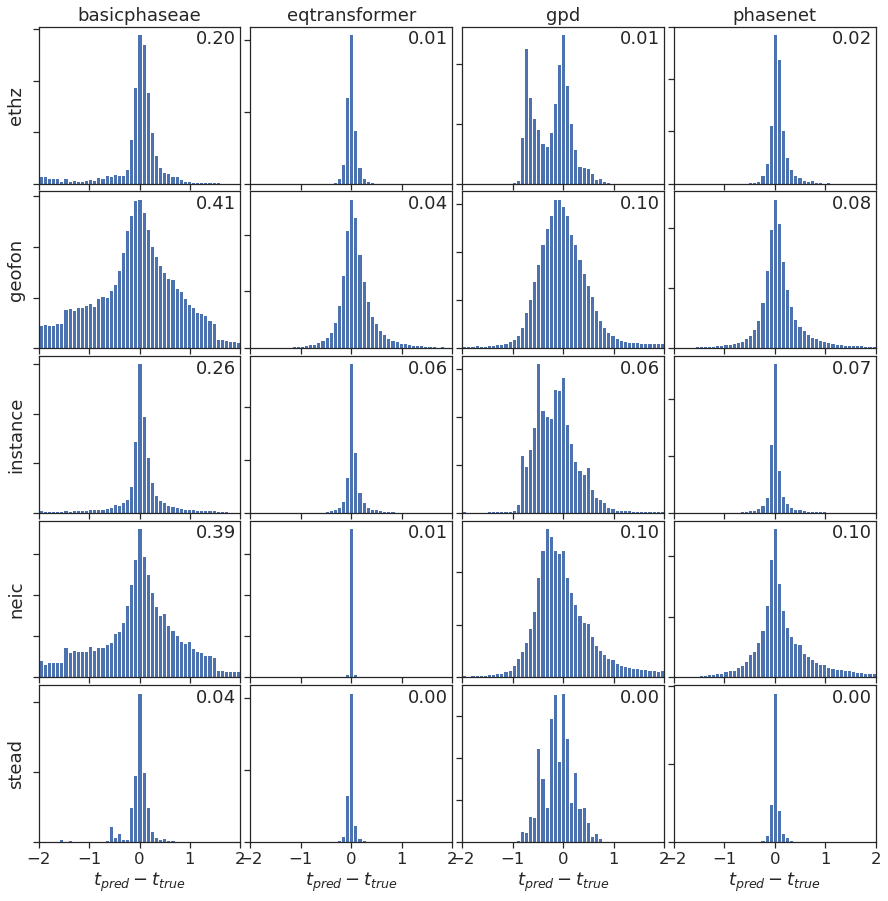

In [160]:
fig = residual_matrix("P", results, Path("pred"))
fig.savefig("test_P_diff.eps", bbox_inches="tight")

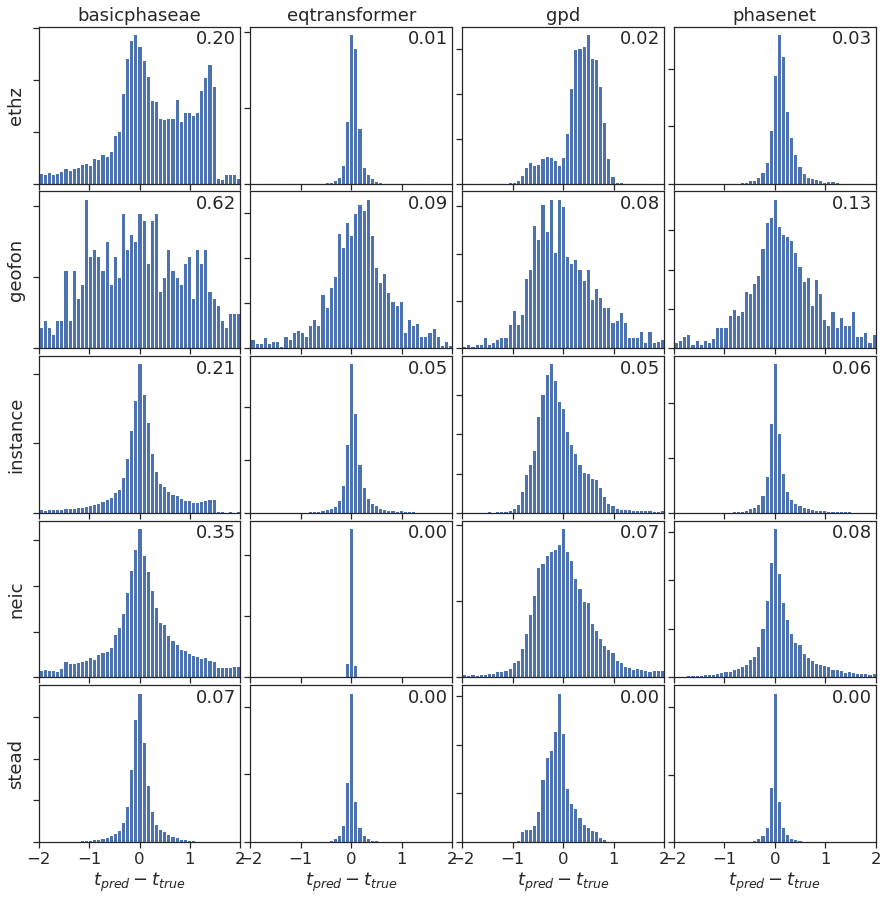

In [161]:
fig = residual_matrix("S", results, Path("pred"))
fig.savefig("test_S_diff.eps", bbox_inches="tight")